In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
import random 
from PIL import Image

# The CAT dataset 

First off, let us define what does C, A and T mean. 

In [608]:
C= np.array([
             [1.,1.,1.],
             [1.,0.,0.],
             [1.,1.,1.]
]) 

A = np.array([
             [0.,1.,0.],
             [1.,0.,1.], 
             [1.,0.,1.]
])
                        
T = np.array([
             [1.,1.,1.],
             [0.,1.,0.],
             [0.,1.,0.]
])

P = np.array([
             [1.,1.,1.],
             [1.,1.,1.],
             [1.,0.,0.]
])

O = np.array([
             [1.,1.,1.],
             [1.,0.,1.],
             [1.,1.,1.]
])

I = np.array([
             [0.,1.,0.],
             [0.,1.,0.],
             [0.,1.,0.]
])

L = np.array([
             [1.,0.,0.],
             [1.,0.,0.],
             [1.,1.,1.]
])

H = np.array([
             [1.,0.,1.],
             [1.,1.,1.],
             [1.,0.,1.]
])

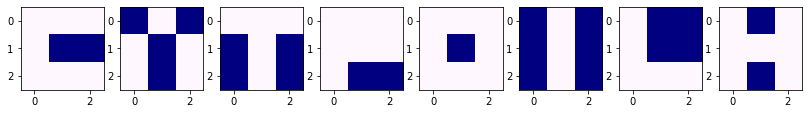

In [609]:
fig, ax = plt.subplots(1, 8, figsize = (14,5))

ax.flat[0].imshow(C) 
ax.flat[1].imshow(A)
ax.flat[2].imshow(T)
ax.flat[3].imshow(P)
ax.flat[4].imshow(O)
ax.flat[5].imshow(I)
ax.flat[6].imshow(L)
ax.flat[7].imshow(H)

In [483]:
labels = {
    "C": 0,
    "A": 1,
    "T": 2,
    "P": 3,
    "O": 4,
    "I": 5,
    "L": 6,
    "H": 7
}

In [487]:
train_data = np.array([
                       (C, int(labels["C"])), 
                       (A, int(labels['A'])),
                       (T, int(labels["T"])),
                       (P, int(labels["P"])),
                       (O, int(labels["O"])),
                       (I, int(labels["I"])),
                       (L, int(labels["L"])),
                       (H, int(labels["H"]))
                    ])

In [488]:
class data_loader(object):
    def __init__(self, data):
        self.data = data
        print("loaded data:", len(self.data), " instances")

    def random_element(self):
        index = random.randint(0, self.data.shape[0] -1)
        return self.data[index]

    def element(self, index):
        image, label = self.data[index]
        image +=  np.random.randn(3,3)/5
        return image, label

In [489]:
train_loader = data_loader(data = train_data)

loaded data: 8  instances


In [490]:
def mse_loss(pred,label):
    loss = np.square(np.subtract(pred,label)).mean() 
    return loss 

In [491]:
def dloss_by_pred(pred, label):

    d = 2*(pred-label)
    return np.array([d])

def drelu(x):
    x[x>0] = 1
    x[x<=0] = 0
    return x

def dleaky_relu(x, alpha = 0.2):
    x[x>0] = 1
    x[x<=0] = alpha
    return x

In [543]:
def relu(m):
    m[m < 0] = 0
    return m

def leaky_relu(z, alpha = 0.2):
    pair = np.array([alpha*z,z])
    return np.max(pair, axis = 0)

class at_least_i_didnt_steal_this_project_idea_from_some_course(object):
    def __init__(self):

        self.layer1 = np.random.randn(9, 15)
        self.layer2 = np.random.randn(15, 1)

    def forward(self,input):

        self.x = input.flatten().reshape(1,-1)
        x_w1 = self.x.dot(self.layer1)
        self.x_w1_relu = leaky_relu(x_w1)
        self.x_w2 = self.x_w1_relu.dot(self.layer2)
        x_w2_relu = leaky_relu(self.x_w2)

        return x_w2_relu

    def take_blind_step(self):

        self.layer1 += np.random.rand(9,15)/5
        self.layer2 += np.random.rand(15,1)/5

    def backward_pass(self,pred,label):

        self.dloss_by_dw2 = dleaky_relu(self.x_w1_relu).reshape(-1,1).dot(dloss_by_pred(pred,label).reshape(1,-1))
        self.dloss_by_dw1 = dleaky_relu(self.x).reshape(-1,1).dot(self.dloss_by_dw2.reshape(1,-1))

    def update_weights(self, step_size = 0.01):

        self.layer1 += - step_size * self.dloss_by_dw1
        self.layer2 += - step_size * self.dloss_by_dw2

In [517]:
chicken_brain = at_least_i_didnt_steal_this_project_idea_from_some_course()

In [518]:
chicken_brain.forward(train_data[0][0])

array([[39.92766824]])

In [508]:
pred = chicken_brain.forward(train_data[0][0]).flatten()[0]
label = 10.0

mse_loss(pred,label)

17554.89366353325

In [509]:
print(pred,label)

142.49488165032358 10.0


In [510]:
chicken_brain.backward_pass(pred,label)

In [511]:
chicken_brain.update_weights()

In [512]:
pred = chicken_brain.forward(train_data[0][0]).flatten()[0]
label = 10.

mse_loss(pred,label)

5270.786637257434

In [513]:
pred,label

(82.60018345195441, 10.0)

In [207]:
!rm -rf animation
!mkdir animation

In [367]:
plt.rcParams['image.cmap'] = 'gist_ncar'


In [601]:
chicken_brain = at_least_i_didnt_steal_this_project_idea_from_some_course()

losses = []
for iter in range(50):
    

    x, label = train_loader.element(iter%8)
    pred = chicken_brain.forward(x).flatten()[0]
    loss = mse_loss(pred,label)
    losses.append(loss)

    chicken_brain.backward_pass(pred,label)
    chicken_brain.update_weights()

    fig, ax = plt.subplots(1,3, figsize = (19,5))

    ax.flat[0].imshow(chicken_brain.layer1)
    ax.flat[0].set_xlabel("Chicken brain layer 1 iteration:" + str(iter + 1), fontsize = 18)
    ax.flat[1].imshow(chicken_brain.layer2)
    ax.flat[1].set_xlabel("Chicken brain layer 2 iteration:" + str(iter + 1), fontsize = 18)
    ax.flat[2].plot(losses)
    ax.flat[2].grid()
    ax.flat[2].set_ylabel("Loss", fontsize = 18)


    fig.savefig("animation/" + str(iter) + ".jpg")
    plt.close("all")


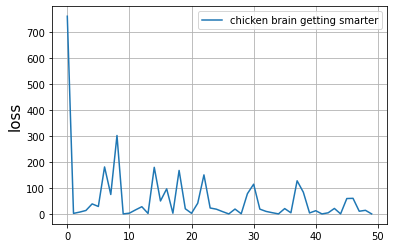

In [602]:
plt.plot(losses, label = ''"chicken brain getting smarter")
plt.ylabel("loss", fontsize = 15)
plt.grid()
plt.legend()
plt.show()

In [ ]:
print("Pred on C: ", chicken_brain.forward(C)[0][0])
print("Pred on A: ", chicken_brain.forward(A)[0][0])
print("Pred on T: ", chicken_brain.forward(T)[0][0])

Pred on C:  0.007372664851417978
Pred on A:  0.8018386026774065
Pred on T:  2.361728449561949


In [606]:
names = [ "animation/" + str(i) + ".jpg" for i in range (0, 50, 1)]
images = []
for n in names:
    frame = Image.open(n)
    # frame = frame.resize((550,200))
    images.append(frame)
print(len(images))

50


In [607]:
images[0].save('weights_small.gif',
               save_all=True,
               append_images=images[1:],
               duration=100,
               loop=0)